## 라이브러리 import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
# 재현성을 위한 코드
random_seed = 777

tf.keras.utils.set_random_seed(random_seed)
# tf.random.normal([5], 0, 1)

## 데이터 불러오기

In [4]:
TrainData = np.array(pd.read_csv('./ProcessedData/TrainData.csv', sep = ",", header = None))
ValidData = np.array(pd.read_csv('./ProcessedData/ValidData.csv', sep = ",", header = None))

TrainLabel = np.array(pd.read_csv('./ProcessedData/TrainLabel.csv', sep = ",", header = None))
ValidLabel = np.array(pd.read_csv('./ProcessedData/ValidLabel.csv', sep = ",", header = None))

TrainData.shape, ValidData.shape, TrainLabel.shape, ValidLabel.shape

((300, 30), (60, 30), (300, 2), (60, 2))

## Keras 기반 ANN(Artificial Neural Network) 구조 설계를 위한 기본 사항

In [5]:
# 모델 선언, 입력 Layer 삽입
keras.backend.clear_session() # 세션 지우기: Keras에서 가지고 있는 변수 초기화
model = keras.Sequential()
model.add(keras.layers.InputLayer(shape = (20,)))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
# 모델에 Dense Layer 삽입
model.add(keras.layers.Dense(units = 10, name = 'Layer1'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Layer1 (Dense)                       │ (None, 10)                  │             210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 210 (840.00 B)

 Trainable params: 210 (840.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
# 활성화 함수가 있는 Dense Layer 넣기, 파라미터 값 초기화
model.add(keras.layers.Dense(units = 10, activation = keras.activations.relu,
                             kernel_initializer = keras.initializers.Zeros(), name = 'Layer2'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Layer1 (Dense)                       │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Layer2 (Dense)                       │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 320 (1.25 KB)

 Trainable params: 320 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# 모델의 Layer 별 파라미터 보기
model.get_weights()[-1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [9]:
# 마지막 Layer 지우기
model.pop()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Layer1 (Dense)                       │ (None, 10)                  │             210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 210 (840.00 B)

 Trainable params: 210 (840.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
# 모델 
model.add(keras.layers.Dense(units = 2, activation = keras.activations.relu, name = 'Layer3'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Layer1 (Dense)                       │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Layer3 (Dense)                       │ (None, 2)                   │              22 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 232 (928.00 B)

 Trainable params: 232 (928.00 B)

 Non-trainable params: 0 (0.00 B)

## ANN(Artificial Neural Network) hyperparameter 설정

In [11]:
learningRate  = 0.0001
noOfNeuron    = 16
Epoch         = 500

## Keras 기반 ANN 구조(Architecture) 설계

https://keras.io/api/layers/activations/ : 활성화 함수 참고   
https://keras.io/api/optimizers/: 최적화 알고리즘 참고   
https://keras.io/api/losses/probabilistic_losses/ : 분류모델 손실함수 참고

In [12]:
def ANN(input_data):
    keras.backend.clear_session() # 세션 지우기
    tf.keras.utils.set_random_seed(random_seed)

    model = keras.Sequential()
    model.add(keras.layers.InputLayer(shape = (input_data.shape[1],) ))                                            # Input  Layer
    model.add(keras.layers.Dense(units = noOfNeuron, activation = keras.activations.relu,    name = 'Hidden1'))    # Hidden Layer 1
    model.add(keras.layers.Dense(units = noOfNeuron, activation = keras.activations.relu,    name = 'Hidden2'))    # Hidden Layer 2
    model.add(keras.layers.Dense(units = 2,          activation = keras.activations.softmax, name = 'Output'))     # Output Layer
    
    model.compile(optimizer = keras.optimizers.Adam(learning_rate = learningRate), # 최적화 알고리즘
                  loss = keras.losses.CategoricalCrossentropy(),                   # 손실 함수(최적화 목적 함수)
                  metrics = ['accuracy'])                                          # 학습 과정에서 측정할 지표
    return model

In [13]:
# 모델 만들기
ANN_model = ANN(TrainData)

# 모델 구조, 파라미터 개수 확인
ANN_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden1 (Dense)                      │ (None, 16)                  │             496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden2 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 802 (3.13 KB)

 Trainable params: 802 (3.13 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# 파라미터 형태 직접 확인
for ind in range(len(ANN_model.get_weights())):
    print(ANN_model.get_weights()[ind].shape)

(30, 16)
(16,)
(16, 16)
(16,)
(16, 2)
(2,)


## Keras 기반 ANN 학습 및 평가

In [15]:
# 모델 학습/검증
hist = ANN_model.fit(TrainData, TrainLabel, epochs=Epoch, verbose = 1)
Loss, Accuracy = ANN_model.evaluate(TrainData,  TrainLabel, verbose=0)

print('Final Loss and Accuracy: {:.4f}, {:.2f}%'.format(Loss, Accuracy*100))

Epoch 1/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4540 - loss: 2.1710
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4540 - loss: 2.0417 
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4540 - loss: 1.9182 
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4540 - loss: 1.7992 
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4540 - loss: 1.6846 
Epoch 6/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4540 - loss: 1.5750 
Epoch 7/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4540 - loss: 1.4766 
Epoch 8/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4540 - loss: 1.3861 
Epoch 9/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4540 - loss: 1.3023 
Epoch 10/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4540 - loss: 1.2246 
Epoch 11/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4540 - loss: 1.1529 
Epoch 12/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5295 - loss: 0.6749 
Epoch 69/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5312 - loss: 0.6746 
Epoch 70/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5312 - loss: 0.6743 
Epoch 71/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5370 - loss: 0.6740 
Epoch 72/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5370 - loss: 0.6737 
Epoch 73/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5370 - loss: 0.6735 
Epoch 74/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5370 - loss: 0.6732 
Epoch 75/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5370 - loss: 0.6729 
Epoch 76/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5370 - loss: 0.6726 
Epoch 77/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5370 - loss: 0.6723 
Epoch 78/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5382 - loss: 0.6720 
Epoch 79/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - ac

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7035 - loss: 0.6519 
Epoch 136/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7044 - loss: 0.6515 
Epoch 137/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7066 - loss: 0.6511
Epoch 138/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7066 - loss: 0.6507  
Epoch 139/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7100 - loss: 0.6503 
Epoch 140/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7100 - loss: 0.6499  
Epoch 141/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7187 - loss: 0.6495 
Epoch 142/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7221 - loss: 0.6491  
Epoch 143/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7221 - loss: 0.6487
Epoch 144/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7238 - loss: 0.6482  
Epoch 145/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7259 - loss: 0.6478  
Epoch 146/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8632 - loss: 0.6204 
Epoch 203/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8632 - loss: 0.6198 
Epoch 204/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8740 - loss: 0.6192 
Epoch 205/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8798 - loss: 0.6185 
Epoch 206/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8798 - loss: 0.6179 
Epoch 207/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8798 - loss: 0.6172 
Epoch 208/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8798 - loss: 0.6165  
Epoch 209/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8842 - loss: 0.6159
Epoch 210/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8864 - loss: 0.6152  
Epoch 211/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8898 - loss: 0.6145 
Epoch 212/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8985 - loss: 0.6138 
Epoch 213/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9346 - loss: 0.5785 
Epoch 270/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9346 - loss: 0.5778 
Epoch 271/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9346 - loss: 0.5772 
Epoch 272/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9346 - loss: 0.5766 
Epoch 273/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9346 - loss: 0.5759 
Epoch 274/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9346 - loss: 0.5752 
Epoch 275/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9346 - loss: 0.5746  
Epoch 276/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9346 - loss: 0.5739  
Epoch 277/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9346 - loss: 0.5732 
Epoch 278/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9368 - loss: 0.5726 
Epoch 279/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9368 - loss: 0.5719 
Epoch 280/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9460 - loss: 0.5264 
Epoch 337/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9460 - loss: 0.5255 
Epoch 338/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9460 - loss: 0.5245
Epoch 339/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9460 - loss: 0.5236
Epoch 340/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9460 - loss: 0.5226  
Epoch 341/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9460 - loss: 0.5217  
Epoch 342/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9460 - loss: 0.5208 
Epoch 343/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9487 - loss: 0.5199 
Epoch 344/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9487 - loss: 0.5189 
Epoch 345/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9487 - loss: 0.5180 
Epoch 346/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9487 - loss: 0.5170 
Epoch 347/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4m

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9655 - loss: 0.4594 
Epoch 404/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9655 - loss: 0.4583 
Epoch 405/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9655 - loss: 0.4573 
Epoch 406/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9655 - loss: 0.4562 
Epoch 407/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9655 - loss: 0.4552  
Epoch 408/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9655 - loss: 0.4541
Epoch 409/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9655 - loss: 0.4530  
Epoch 410/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9655 - loss: 0.4520  
Epoch 411/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9655 - loss: 0.4509  
Epoch 412/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9655 - loss: 0.4498 
Epoch 413/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9655 - loss: 0.4488
Epoch 414/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9668 - loss: 0.3449 
Epoch 471/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9668 - loss: 0.3435 
Epoch 472/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9668 - loss: 0.3421 
Epoch 473/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9668 - loss: 0.3408 
Epoch 474/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9668 - loss: 0.3394  
Epoch 475/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9668 - loss: 0.3380
Epoch 476/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9668 - loss: 0.3367  
Epoch 477/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9668 - loss: 0.3353  
Epoch 478/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9668 - loss: 0.3340 
Epoch 479/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9668 - loss: 0.3327 
Epoch 480/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9668 - loss: 0.3314 
Epoch 481/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 

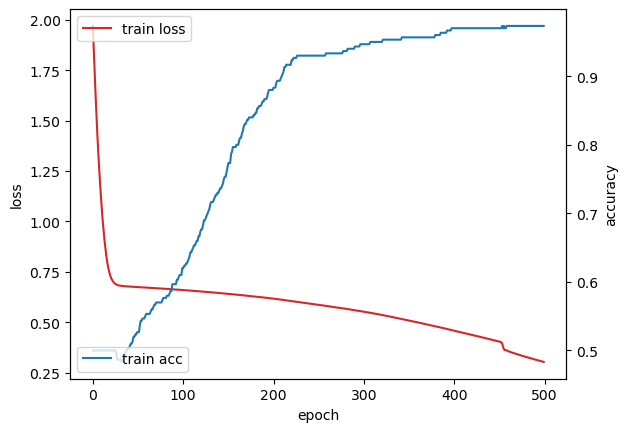

In [16]:
# 학습 과정 확인(Loss, Accuracy)
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], label='train loss', color = "tab:red")
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist.history['accuracy'], label='train acc', color = "tab:blue")
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()

In [17]:
Loss, Accuracy = ANN_model.evaluate(ValidData,  ValidLabel, verbose=0)

print('Validation Accuracy: {:.2f}%'.format(Accuracy*100))

Validation Accuracy: 96.67%


In [18]:
# 모델 저장
ANN_model.save('./MLmodels/ANN_model.keras')

## ANN model 불러와서 진단

In [19]:
# 모델 불러오기
LoadedModel = keras.models.load_model('./MLmodels/ANN_model.keras')

In [20]:
Loss, Accuracy = LoadedModel.evaluate(ValidData,  ValidLabel, verbose=0)

print('[Performance of ANN model] \n')
print('Accuracy : {:.2f}%'.format(Accuracy*100))

[Performance of ANN model] 

Accuracy : 96.67%


In [21]:
# 예측값(확률) 확인
Predict_y = LoadedModel.predict(ValidData, verbose = 0)
pd.DataFrame(Predict_y)

,0,1
0,0.785848,0.214152
1,0.732191,0.267809
2,0.775680,0.224320
3,0.743801,0.256199
4,0.764138,0.235862
5,0.776067,0.223933
6,0.393608,0.606392
7,0.809595,0.190405
8,0.808396,0.191604
9,0.791593,0.208407


## ++. Confusion Matrix 확인

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [23]:
# 분류 결과 확인
Pred = LoadedModel.predict(ValidData)
pd.DataFrame(Pred)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


,0,1
0,0.785848,0.214152
1,0.732191,0.267809
2,0.775680,0.224320
3,0.743801,0.256199
4,0.764138,0.235862
5,0.776067,0.223933
6,0.393608,0.606392
7,0.809595,0.190405
8,0.808396,0.191604
9,0.791593,0.208407


In [24]:
# One-hot encoding -> Label encoding
true = np.argmax(ValidLabel, axis=-1)
pred = np.argmax(Pred, axis=-1)

# Confusion Matrix 생성
CM = confusion_matrix(true, pred).T

# 데이터의 실제/분류결과 이름
x = ['Normal_True', 'Abnormal_True']
y = ['Normal_Pred', 'Abnormal_Pred']

CM_df = pd.DataFrame(CM,columns=x, index=y)
CM_df

,Normal_True,Abnormal_True
Normal_Pred,29,1
Abnormal_Pred,1,29


C:\Users\BJ\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


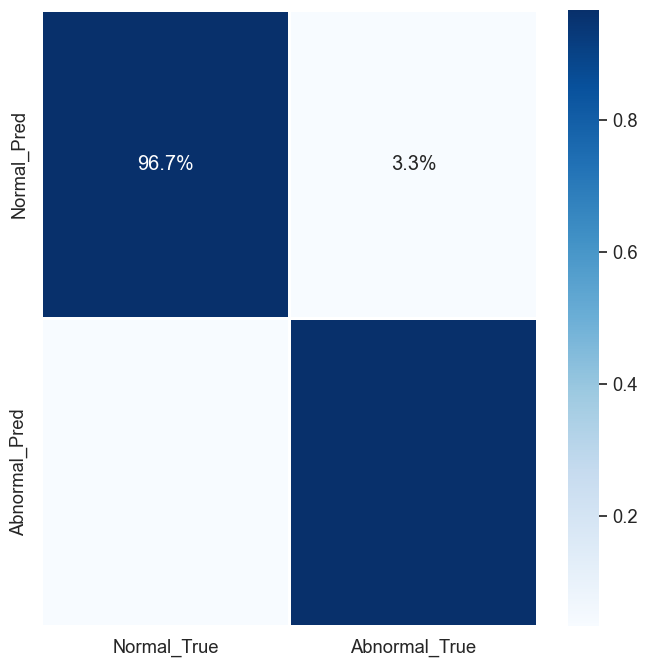

In [25]:
# heatmap font size
sns.set(font_scale=1.2)

# Heatmap 형태로 확인
fig = plt.subplots(figsize=(8,8))


# 퍼센트
sns.heatmap(CM_df/np.sum(CM_df),
            cmap='Blues',          # cmap Color
            annot=True,            # Value Text
            fmt=".1%",             # Value type (integer = "d")
            linewidths=2)

# 갯수
# sns.heatmap(CM_df,
#             cmap='Blues',        # cmap Color
#             annot=True,          # Value Text
#             fmt="d",             # Value type (integer = "d")
#             linewidths=2) 



plt.show()